In [3]:
import pandas as pd

# Load the CSV
labels_path = "../data/raw/trainLabels.csv"
df = pd.read_csv(labels_path)

# Show the first few rows
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [5]:
len(df)


50000

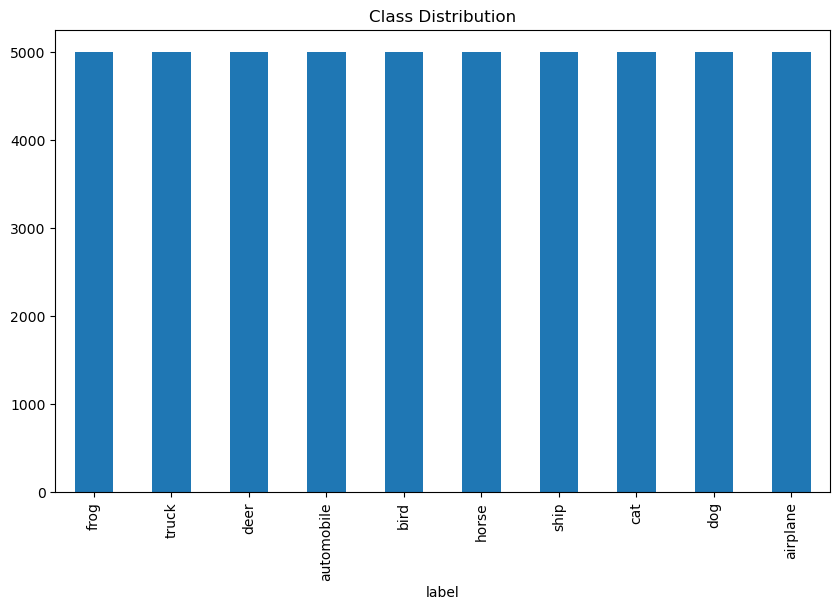

In [11]:
df['label'].value_counts().plot(kind='bar', figsize=(10, 6), title="Class Distribution");


In [9]:
print("Total rows:", len(df))
print("Unique labels:", df['label'].nunique())
print(df['label'].value_counts())


Total rows: 50000
Unique labels: 10
label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64


In [13]:
import os

image_folder = "../data/processed/train"
missing = []

for img_id in df['id']:
    filename = f"{img_id}.png"
    if not os.path.isfile(os.path.join(image_folder, filename)):
        missing.append(filename)

print(f"Missing images: {len(missing)}")


Missing images: 0


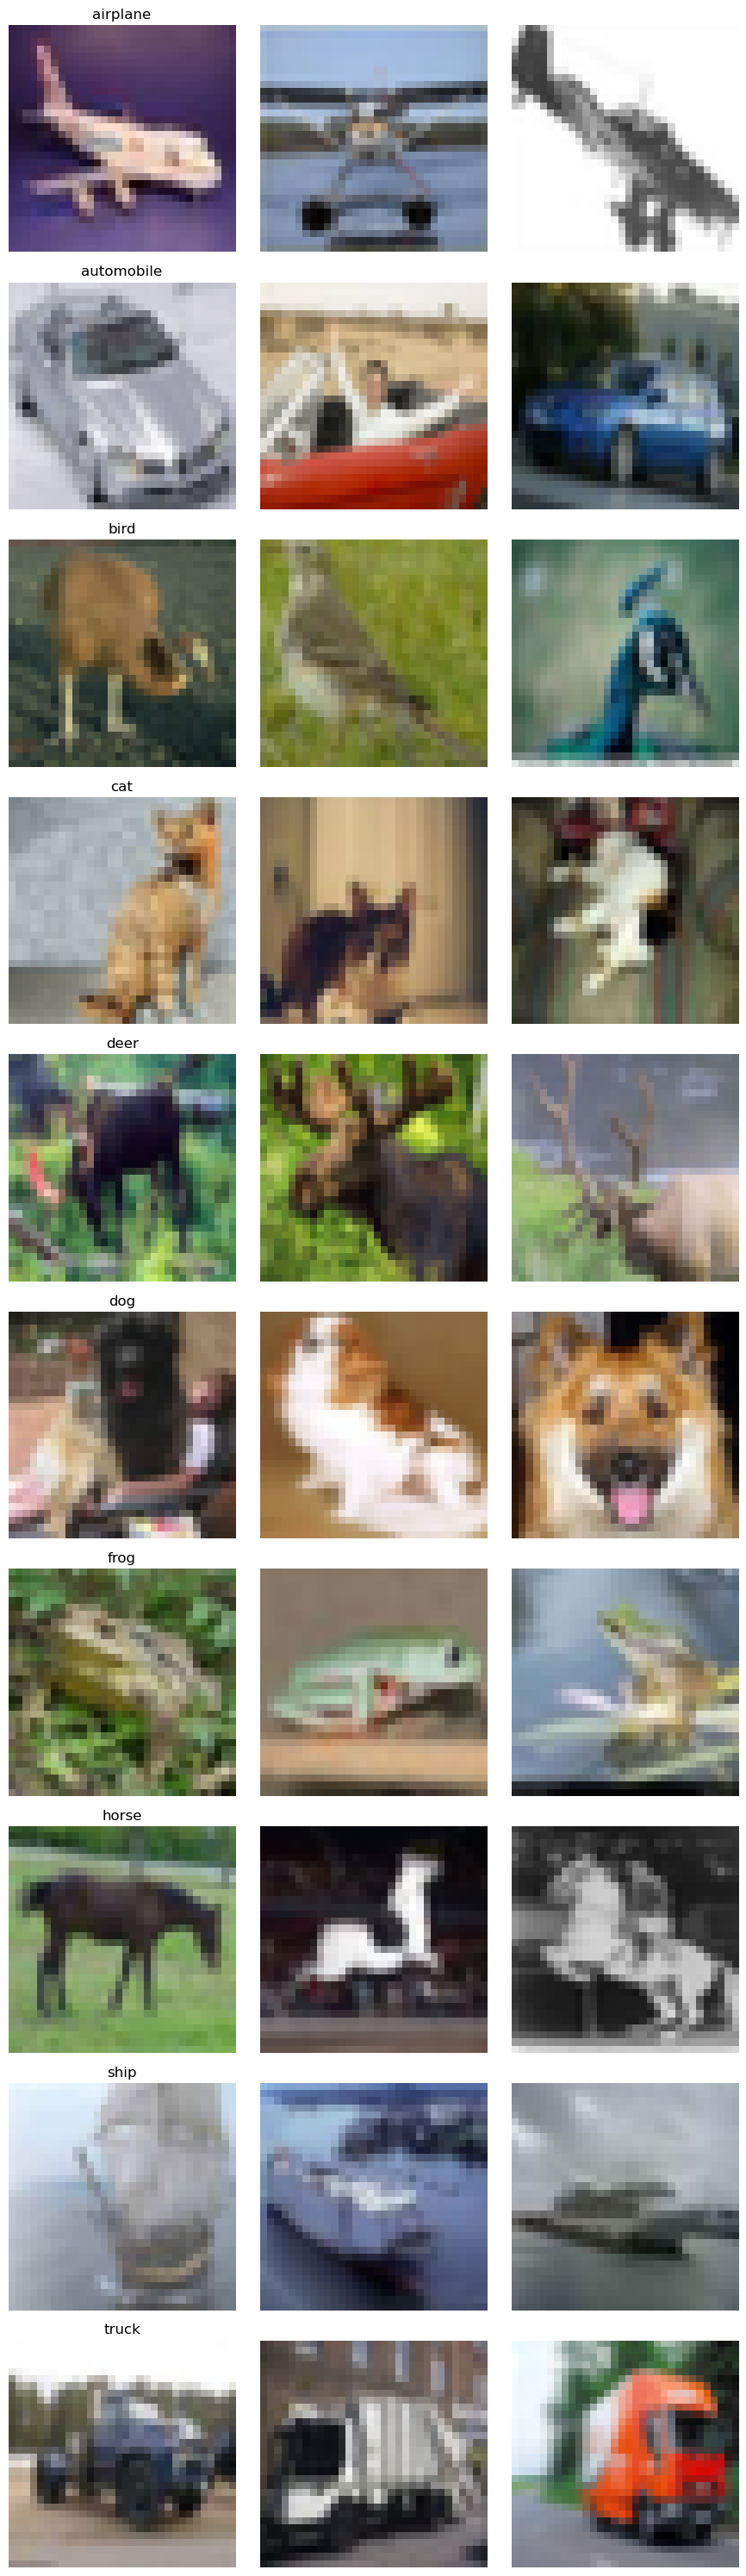

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

def show_images_per_class(df, image_folder, samples_per_class=3):
    classes = df['label'].unique()
    fig, axs = plt.subplots(len(classes), samples_per_class, figsize=(samples_per_class*3, len(classes)*3))

    for i, cls in enumerate(sorted(classes)):
        sample_ids = df[df['label'] == cls].sample(samples_per_class)['id'].tolist()
        for j, img_id in enumerate(sample_ids):
            img_path = os.path.join(image_folder, f"{img_id}.png")
            image = Image.open(img_path)
            axs[i, j].imshow(image)
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_title(cls)

    plt.tight_layout()
    plt.show()

show_images_per_class(df, image_folder="../data/processed/train")
